# 🧠 Kor-DEEPression
### 📊 Step 2-2. EDA 및 시각화 분석
> 🍷 작성자 : Codestates AIB 15기 정경재 (Kyung Jae, Cheong)
---

### 💻 라이브러리 및 데이터 불러오기

- Library Import (라이브러리 불러오기)

In [13]:
# Library Import
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plex
import plotly.graph_objects as go
from plotly.subplots import make_subplots as plsp

# Matplotlib setting for VSCode
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
# Renderer setting for VSCode & Github
import plotly.io as pio
pio.renderers.default = 'vscode+png'

- EDA Data Import (EDA 데이터 불러오기)

In [2]:
# csv파일을 DataFrame으로 불러오기(Depression)
df_depr = pd.read_csv('downloads/EDA_depr.csv')
print("Depression(정상vs우울증)")
df_depr.head()

Depression(정상vs우울증)


,id,year,age,BMI,sex,education,household,marital,economy,subj_health,...,modality,w_change,high_bp,diabetes,dyslipidemia,drk_freq,drk_amount,smoke,stress,depression
0,A209716213,2014,30,28.939858,Female,대졸 이상,2세대,미혼,실업자/비경제활동인구,보통,...,No,No,No,No,No,월 1회 미만,1-2잔,비흡연/과거흡연,적게 느끼는 편임,No
1,A209716216,2014,29,28.659708,Male,대졸 이상,2세대,미혼,실업자/비경제활동인구,보통,...,No,No,No,No,No,월 2-4회 정도,5-6잔,비흡연/과거흡연,거의 느끼지 않음,No
2,A209724716,2014,65,20.188238,Male,초졸 이하,1세대,기혼(유배우자),취업자,보통,...,No,No,Yes,Yes,No,평생 마셔본 적 없음,전혀 안마심,현재흡연,적게 느끼는 편임,No
3,A209731516,2014,66,24.145909,Male,대졸 이상,1세대,기혼(유배우자),실업자/비경제활동인구,좋음,...,No,No,No,No,No,1년간 마셔본 적 없음,전혀 안마심,비흡연/과거흡연,적게 느끼는 편임,No
4,A209736615,2014,41,30.598080,Female,고졸,2세대,기혼(유배우자),실업자/비경제활동인구,보통,...,Yes,No,No,No,No,주 4회 이상,10잔 이상,비흡연/과거흡연,대단히 많이 느낌,Yes


In [3]:
# csv파일을 DataFrame으로 불러오기(MDD)
df_mdd = pd.read_csv('downloads/EDA_mdd.csv')
print("MDD(경도우울vs주요우울)")
df_mdd.head()

MDD(경도우울vs주요우울)


,id,year,age,BMI,sex,education,household,marital,economy,subj_health,...,modality,w_change,high_bp,diabetes,dyslipidemia,drk_freq,drk_amount,smoke,stress,MDD
0,A209736615,2014,41,30.598080,Female,고졸,2세대,기혼(유배우자),실업자/비경제활동인구,보통,...,Yes,No,No,No,No,주 4회 이상,10잔 이상,비흡연/과거흡연,대단히 많이 느낌,No
1,A209745116,2014,40,27.439809,Male,고졸,1인 가구,미혼,취업자,보통,...,No,No,Yes,No,No,주 2-3회 정도,10잔 이상,비흡연/과거흡연,많이 느끼는 편임,No
2,A209799515,2014,64,27.029877,Female,고졸,2세대,기혼(유배우자),취업자,보통,...,No,No,Yes,No,No,월 2-4회 정도,1-2잔,비흡연/과거흡연,많이 느끼는 편임,No
3,A210729816,2014,64,18.286207,Female,초졸 이하,1인 가구,사별/이혼,실업자/비경제활동인구,매우 나쁨,...,Yes,No,Yes,No,Yes,1년간 마셔본 적 없음,전혀 안마심,비흡연/과거흡연,적게 느끼는 편임,Yes
4,A210741715,2014,73,21.068808,Female,초졸 이하,1세대,기혼(유배우자),취업자,나쁨,...,Yes,No,Yes,No,Yes,1년간 마셔본 적 없음,전혀 안마심,비흡연/과거흡연,많이 느끼는 편임,Yes


### 🔎 데이터 확인

- Shape (모양 확인)

In [4]:
# Shape 확인
print(f"Data Shape (Depression) : {df_depr.shape}")
print(f"Data Shape (MDD) : {df_mdd.shape}")

Data Shape (Depression) : (16570, 21)
Data Shape (MDD) : (3359, 21)


- Check Null values & Duplicate values (결측값 및 중복값)

In [5]:
# 결측치 확인
print(f"Sum of Null Values (Depression) : {df_depr.isnull().sum().sum()}")
print(f"Sum of Null Values (MDD) : {df_mdd.isnull().sum().sum()}")
# 중복값 확인 (고유식별코드인 "id" column만 확인)
print(f"Sum of Duplicated Data (Depression) : {df_depr.id.duplicated().sum()}")
print(f"Sum of Duplicated Data (MDD) : {df_mdd.id.duplicated().sum()}")

Sum of Null Values (Depression) : 0
Sum of Null Values (MDD) : 0
Sum of Duplicated Data (Depression) : 0
Sum of Duplicated Data (MDD) : 0


- column's dtype (column 타입)

In [6]:
# Column 별 dtype을 확인 (Depression)
print("Dtypes (Depression)")
print(df_depr.dtypes)

Dtypes (Depression)
id               object
year              int64
age               int64
BMI             float64
sex              object
education        object
household        object
marital          object
economy          object
subj_health      object
limitation       object
modality         object
w_change         object
high_bp          object
diabetes         object
dyslipidemia     object
drk_freq         object
drk_amount       object
smoke            object
stress           object
depression       object
dtype: object


In [7]:
# Column 별 dtype을 확인 (MDD)
print("Dtypes (MDD)")
print(df_mdd.dtypes)

Dtypes (MDD)
id               object
year              int64
age               int64
BMI             float64
sex              object
education        object
household        object
marital          object
economy          object
subj_health      object
limitation       object
modality         object
w_change         object
high_bp          object
diabetes         object
dyslipidemia     object
drk_freq         object
drk_amount       object
smoke            object
stress           object
MDD              object
dtype: object


In [8]:
# dtype 일치여부 확인
list(df_depr.dtypes) == list(df_mdd.dtypes)

True

- Variable Classification (변수 분류)

In [9]:
# 식별코드 "id"를 제외한 변수들의 수치형 변수 및 범주형 변수 갯수 확인
# describe() 함수의 include 기능을 활용하여 갯수를 산출함(number에 int,float 모두 포함되므로 좀 더 간편하게 산출할 수 있음)
print('(Depression)')
print(f"Sum of Numerical Data : {df_depr.iloc[:,1:].describe(include=['number']).shape[1]}")
print(f"Sum of Categorical Data : {df_depr.iloc[:,1:].describe(include=['object']).shape[1]}")
print('(MDD)')
print(f"Sum of Numerical Data : {df_mdd.iloc[:,1:].describe(include=['number']).shape[1]}")
print(f"Sum of Categorical Data : {df_mdd.iloc[:,1:].describe(include=['object']).shape[1]}")

(Depression)
Sum of Numerical Data : 3
Sum of Categorical Data : 17
(MDD)
Sum of Numerical Data : 3
Sum of Categorical Data : 17


- Descriptive Statistics (기술 통계 요약)

In [10]:
# 수치형 변수 기술통계(descriptive statistics)
print('(Depression)')
display(df_depr.iloc[:,1:].describe(include=['number']).round(1).T)
print('(MDD)')
display(df_mdd.iloc[:,1:].describe(include=['number']).round(1).T)

(Depression)


,count,mean,std,min,25%,50%,75%,max
year,16570.0,2017.2,2.2,2014.0,2016.0,2018.0,2020.0,2020.0
age,16570.0,51.4,16.7,19.0,38.0,52.0,65.0,80.0
BMI,16570.0,24.0,3.6,14.1,21.5,23.7,26.0,62.6


(MDD)


,count,mean,std,min,25%,50%,75%,max
year,3359.0,2017.0,2.2,2014.0,2016.0,2016.0,2018.0,2020.0
age,3359.0,50.6,17.7,19.0,35.0,51.0,66.0,80.0
BMI,3359.0,23.9,3.8,14.1,21.3,23.4,26.2,50.9


In [11]:
# 범주형 변수 기술통계(descriptive statistics)
print('(Depression)')
display(df_depr.iloc[:,1:].describe(include=['object']).T)
print('(MDD)')
display(df_mdd.iloc[:,1:].describe(include=['object']).T)

(Depression)


,count,unique,top,freq
sex,16570,2,Female,9557
education,16570,4,대졸 이상,6049
household,16570,4,2세대,9146
marital,16570,3,기혼(유배우자),11644
economy,16570,2,취업자,9630
subj_health,16570,5,보통,8591
limitation,16570,2,No,15328
modality,16570,2,No,13358
w_change,16570,2,No,14969
high_bp,16570,2,No,11312


(MDD)


,count,unique,top,freq
sex,3359,2,Female,2305
education,3359,4,고졸,1116
household,3359,4,2세대,1779
marital,3359,3,기혼(유배우자),2017
economy,3359,2,실업자/비경제활동인구,1725
subj_health,3359,5,보통,1564
limitation,3359,2,No,2735
modality,3359,2,No,2171
w_change,3359,2,No,2897
high_bp,3359,2,No,2308


- 독립변수 및 종속변수

In [12]:
num_cols = list(df_depr.iloc[:,1:].describe(include=['number']).columns[1:])
cat_cols = list(df_depr.iloc[:,1:].describe(include=['object']).columns[:-1])
print("독립변수(Independent Variable)")
print(f"\t수치형 변수(Numerical Data) : 총 {len(num_cols)} 개")
print(f"\t범주형 변수(Categorical Data) : 총 {len(cat_cols)} 개")
print("종속변수(Dependent Variable)")
print(f"\tDepression(정상vs우울증) : '{df_depr.columns[-1]}'")
print(f"\tMDD(경도우울vs주요우울) : '{df_mdd.columns[-1]}'")

독립변수(Independent Variable)
	수치형 변수(Numerical Data) : 총 2 개
	범주형 변수(Categorical Data) : 총 16 개
종속변수(Dependent Variable)
	Depression(정상vs우울증) : 'depression'
	MDD(경도우울vs주요우울) : 'MDD'


##### 💡 데이터 확인 결과 요약
- Data Shape(데이터 형태)
  <br><br>
  - Depression(정상vs우울증) : (16570, 21)
  - MDD(경도우울vs주요우울) : (3359, 21)
<br><br>
- 결측값 및 중복값
  <br><br>
  - 공통적으로 전처리를 거친 데이터들이기 때문에 결측데이터 및 중복데이터는 없음.
<br><br>
- 변수 분류(전체)
  <br><br>
  - 식별코드인 id를 제외하고 수치형 및 범주형 데이터 갯수는 다음과 같음.
  <br><br>
  - 수치형 변수(Numerical Data) : 총 3개 ['year', 'age', 'BMI']
  - 범주형 변수(Categorical Data) : 총 17개
<br><br>
- 변수 분류(독립변수 및 종속변수)
  <br><br>
  - column 중 'year' 변수는 EDA 및 대시보드에서만 활용하고, 모델링에서는 활용하지 않을 예정이기 때문에 독립변수 및 종속변수는 다음과 같음.
  <br><br>
  - 독립변수(Independent Variable)
    - 수치형 변수(Numerical Data) : 총 2개 ['age', 'BMI']
    - 범주형 변수(Categorical Data) : 총 16개 ['sex', $\cdots$ , 'stress']
  - 종속변수(Dependent Variable)
    - Depression(정상vs우울증) : 'depression'
    - MDD(경도우울vs주요우울) : 'MDD'

### 🎯 종속변수(Targets) 분포(Distribution)

- Depression(정상vs우울증)

In [33]:
# Group By Target counts
group_depr = df_depr.groupby(['depression'], as_index=False)['id'].count()
display(group_depr)
# 변수 값 수정
count_depr = group_depr.replace({'No': 'Normal (정상)', 'Yes': 'Depression (우울증)'})
display(count_depr)

,depression,id
0,No,13211
1,Yes,3359


,depression,id
0,Normal (정상),13211
1,Depression (우울증),3359


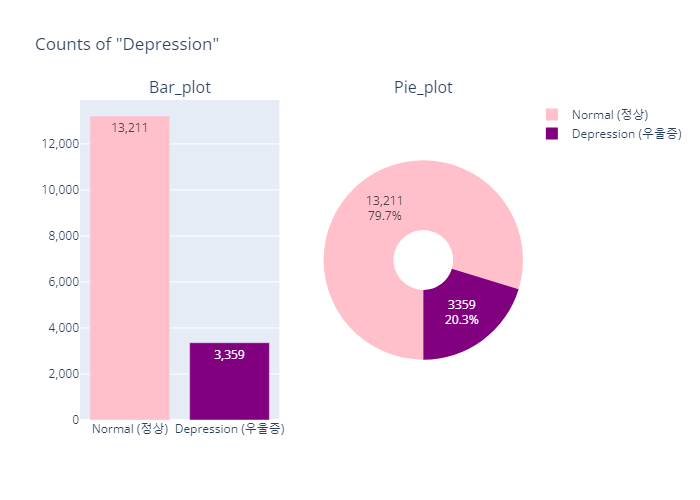

In [100]:
plot_depr = plsp(rows=1, cols=2,
                 subplot_titles=('Bar_plot','Pie_plot'),
                 specs=[[{'type':'xy'}, {'type':'domain'}]])
plot_depr.add_trace(
    go.Bar(x=count_depr.depression,
           y=count_depr.id,
           marker_color=['pink', 'purple'],
           texttemplate="%{y:,}",
           showlegend=False
           ),
    row=1, col=1
)
plot_depr.add_trace(
    go.Pie(values=count_depr.id,
           labels=count_depr.depression,
           hole=0.3,
           showlegend=True,
           marker_colors=['pink', 'purple'],
           hoverinfo="label+value+percent",
           textinfo='value+percent',
           rotation=180
           ),
    row=1, col=2
)
plot_depr.update_layout(title_text='Counts of "Depression"')
plot_depr.update_yaxes(tickformat=',')
plot_depr.show()